In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cx_Oracle
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
def oneHourAgoFromNow():
    now = datetime.datetime.now()
    nowDatetime = now.strftime('%Y-%m-%d %H:%M')
    later = nowDatetime[:11] + minusHour(nowDatetime[11:13]) + ':00'
    return later

def switch_time(ref):
    if int(ref)%10==int(ref):
        return oneHourAgoFromNow()[:11]+'0'+ref+':00'
    else:
        return oneHourAgoFromNow()[:11]+ref+':00'
    
def minusHour(hour):
    number = int(hour)
    if number==0:
        return "23"
    else:
        number -= 1
        if number%10==number:
            return "0"+str(number)
        else:
            return str(number)

In [3]:
conn = cx_Oracle.connect('SCOTT/TIGER@localhost:1521/XE')
db = conn.cursor()
db.execute('select * from predictedData where refTime=:time', time = oneHourAgoFromNow())
data_list = []
for record in db:
    data_list.append(record)

df = pd.DataFrame(data_list, columns = ['time', 'location', 'm1', 'cm1', 'm2', 'cm2', 'm3', 'cm3'])
m_list = ['m1', 'm2', 'm3']
cm_list = ['cm1', 'cm2', 'cm3']

for c in m_list:
    Class_list = []
    for i in range(25):
        value = df[c][i]
        if value <= 30:
            Class_list.append(1)
        elif 30 < value <= 50:
            Class_list.append(2)
        elif 50 < value <= 100:
            Class_list.append(3)
        else:
            Class_list.append(4)
    df[c+'Class']=Class_list

for c in cm_list:
    Class_list = []
    for i in range(25):
        value = df[c][i]
        if value <= 15:
            Class_list.append(1)
        elif 15 < value <= 25:
            Class_list.append(2)
        elif 25 < value <= 50:
            Class_list.append(3)
        else:
            Class_list.append(4)
    df[c+'Class']=Class_list
    
db.close()
conn.close()

In [4]:
df1 = df[['location','m1Class']]
df1.columns=['loc', 'position']
df1['step'] = 1
df2 = df[['location','m2Class']]
df2.columns=['loc', 'position']
df2['step'] = 2
df3 = df[['location','m3Class']]
df3.columns=['loc', 'position']
df3['step'] = 3
df_final = pd.concat([df1, df2])
df_final = pd.concat([df_final, df3])
df_final = df_final.reset_index()
df_final = df_final.drop('index', axis=1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [5]:
cdf1 = df[['location','cm1Class']]
cdf1.columns=['loc', 'position']
cdf1['step'] = 1
cdf2 = df[['location','cm2Class']]
cdf2.columns=['loc', 'position']
cdf2['step'] = 2
cdf3 = df[['location','cm3Class']]
cdf3.columns=['loc', 'position']
cdf3['step'] = 3
cdf_final = pd.concat([cdf1, cdf2])
cdf_final = pd.concat([cdf_final, cdf3])
cdf_final = cdf_final.reset_index()
cdf_final = cdf_final.drop('index', axis=1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [6]:
def make_mise_plot():
    word = oneHourAgoFromNow().replace("-", "")
    word = word.replace(" ", "")
    word = word.replace(":", "")
    grid1 = sns.FacetGrid(df_final, col="loc", hue="loc", col_wrap=5, size=1.5)
    grid1.map(plt.axhline, y=2.5, ls=":", c=".5")
    grid1.map(plt.plot, "step", "position", marker="o", ms=4)
    grid1.set(xticks=np.arange(5), yticks=[1, 2, 3, 4], xlim=(.5, 3.5), ylim=(-.5, 4.5))
    grid1.fig.tight_layout(w_pad=1)
    title = 'C:\\0.bigData\\4.web\\Soup\\WebContent\\images' + word+ '_mise.png'
    plt.savefig(title)
    
def make_chomise_plot():
    word = oneHourAgoFromNow().replace("-", "")
    word = word.replace(" ", "")
    word = word.replace(":", "")
    grid1 = sns.FacetGrid(cdf_final, col="loc", hue="loc", col_wrap=5, size=1.5)
    grid1.map(plt.axhline, y=2.5, ls=":", c=".5")
    grid1.map(plt.plot, "step", "position", marker="o", ms=4)
    grid1.set(xticks=np.arange(5), yticks=[1, 4], xlim=(.5, 3.5), ylim=(-.5, 4.5))
    grid1.fig.tight_layout(w_pad=1)
    title = 'C:\\0.bigData\\4.web\\Soup\\WebContent\\images' + word+ '_chomise.png'
    plt.savefig(title)

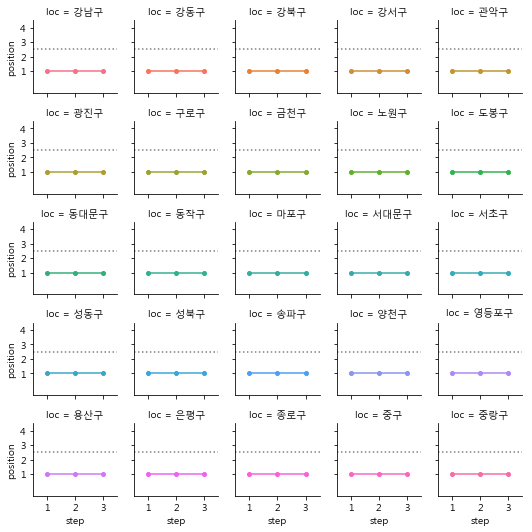

In [7]:
make_mise_plot()

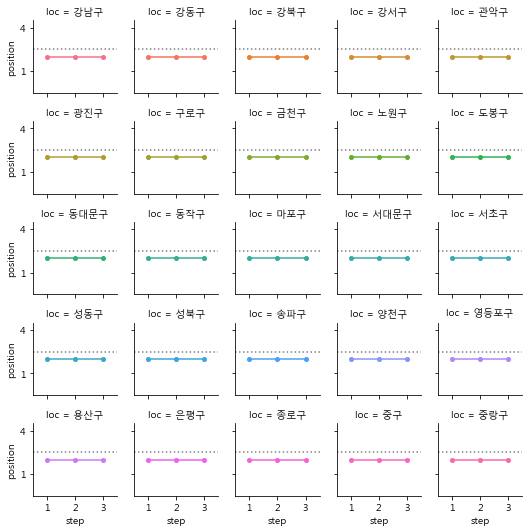

In [8]:
make_chomise_plot()